## Init environnement ⚙

In [1]:
!git clone https://github.com/mybenkhadda/docxchain.git

Cloning into 'docxchain'...
remote: Enumerating objects: 693, done.
remote: Counting objects: 100% (329/329), done.
remote: Compressing objects: 100% (258/258), done.
remote: Total 693 (delta 150), reused 188 (delta 61), pack-reused 364
Receiving objects: 100% (693/693), 257.16 MiB | 19.26 MiB/s, done.
Resolving deltas: 100% (205/205), done.


In [2]:
%cd docxchain/docxchain

/kaggle/working/docxchain/docxchain


In [3]:
! pip install -q pdf2image ipdb modelscope datasets==2.18.0 rapid_latex_ocr pyclipper tf_slim langchain chromadb

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
keras-cv 0.8.2 requires keras-core, which is not installed.
keras-nlp 0.9.3 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.
boto

In [4]:
!pip install --upgrade "tensorflow<=2.10"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 80.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 82.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 35.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-es

In [5]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 83.0 kB/s eta 0:00:0000:01


In [6]:
!apt-get install poppler-utils -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpoppler97 poppler-data
Suggested packages:
  ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  libpoppler97 poppler-data poppler-utils
0 upgraded, 3 newly installed, 0 to remove and 65 not upgraded.
Need to get 2564 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 poppler-data all 0.4.9-2 [1475 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libpoppler97 amd64 0.86.1-0ubuntu1.4 [916 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.4 [174 kB]
Fetched 2564 kB in 0s (16.5 MB/s)       
Selecting previously unselected package

In [7]:
!sudo apt install tesseract-ocr — yes
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package —
E: Unable to locate package yes


In [8]:
!mkdir home

!wget https://zenodo.org/records/11353044/files/DocXLayout_231012.pth -P home
!wget https://zenodo.org/records/11353044/files/LaTeX-OCR_decoder.onnx -P home
!wget https://zenodo.org/records/11353044/files/LaTeX-OCR_encoder.onnx -P home
!wget https://zenodo.org/records/11353044/files/LaTeX-OCR_image_resizer.onnx -P home
!wget https://zenodo.org/records/11353044/files/LaTeX-OCR_tokenizer.json -P home
!wget https://zenodo.org/records/11353044/files/tessdata-main.zip -P home
!unzip home/tessdata-main.zip -d home

--2024-06-17 08:39:53--  https://zenodo.org/records/11353044/files/DocXLayout_231012.pth
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77013789 (73M) [application/octet-stream]
Saving to: 'home/DocXLayout_231012.pth'

DocXLayout_231012.p 100%[===================>]  73.45M  5.72MB/s    in 15s     

2024-06-17 08:40:14 (4.93 MB/s) - 'home/DocXLayout_231012.pth' saved [77013789/77013789]

--2024-06-17 08:40:15--  https://zenodo.org/records/11353044/files/LaTeX-OCR_decoder.onnx
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 504 Gateway Time-out
Retrying.

--2024-06-17 08:40:46--  (try: 2)  https://zenodo.org/records/11353044/files/LaTeX-OCR_decoder.onnx
Connecting to ze

In [9]:
!pip install langchain-chroma 
!pip install langchain-community langchain-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.9 MB/s eta 0:00:0000:01


## Challenge 1: Parsing 🔎

In [10]:
import docxchain_po
import pandas as pd
import numpy as np

2024-06-17 08:46:50,833 - modelscope - INFO - PyTorch version 2.1.2 Found.
2024-06-17 08:46:50,838 - modelscope - INFO - TensorFlow version 2.10.0 Found.
2024-06-17 08:46:50,839 - modelscope - INFO - Loading ast index from /root/.cache/modelscope/ast_indexer
2024-06-17 08:46:50,840 - modelscope - INFO - No valid ast index found from /root/.cache/modelscope/ast_indexer, generating ast index from prebuilt!
2024-06-17 08:46:50,929 - modelscope - INFO - Loading done! Current index file version is 1.15.0, with md5 a665f637a9733b7652717c3f3a8f680f and a total number of 980 components indexed


In [11]:
d = docxchain_po.DocxChain_PO()

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /kaggle/working/docxchain/docxchain/../../exp/ctdet_subfield/default
heads {'hm': 11, 'cls': 4, 'ftype': 3, 'wh': 8, 'hm_sub': 2, 'wh_sub': 8, 'reg': 2, 'reg_sub': 2}
[0]
--> loading model from local file: home/DocXLayout_231012.pth


2024-06-17 08:46:58,397 - modelscope - WARNING - Model revision not specified, use revision: v1.0.0
Downloading: 100%|██████████| 312M/312M [00:08<00:00, 38.8MB/s] 
Downloading: 100%|██████████| 41.7k/41.7k [00:01<00:00, 42.3kB/s]
Downloading: 100%|██████████| 8.06M/8.06M [00:00<00:00, 8.72MB/s]
Downloading: 0.00B [00:00, ?B/s]
Downloading: 100%|██████████| 118/118 [00:00<00:00, 121B/s]
Downloading: 100%|██████████| 61.7k/61.7k [00:00<00:00, 69.7kB/s]
Downloading: 100%|██████████| 313k/313k [00:00<00:00, 366kB/s]
Downloading: 100%|██████████| 436k/436k [00:00<00:00, 480kB/s]
Downloading: 100%|██████████| 24.0/24.0 [00:00<00:00, 27.5B/s]
Downloading: 100%|██████████| 3.93k/3.93k [00:00<00:00, 4.44kB/s]
2024-06-17 08:47:16.886006: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWa

In [12]:
doc = d.document_structure("../documents/purchasing_contract_example.pdf")

In [13]:
df = d.json2df(doc)

In [14]:
df[df["category_name"] == "table"]

,region,category_name,content,page
58,"[99, 978, 1563, 978, 1563, 1381, 99, 1381]",table,Remise accordee (en %) sur le Nom du Package T...,2
60,"[92, 1485, 1558, 1485, 1558, 1857, 92, 1857]",table,N Nom du Produit ENOVIA V6 Trigramme Remise ac...,2
64,"[96, 44, 831, 44, 831, 648, 96, 648]",table,CATIA - MECHANICAL DESIGN 2 Configuration MD2 ...,3
66,"[101, 788, 1062, 788, 1062, 1372, 101, 1372]",table,CATIA - MECHANICAL DESIGN 2 Configuration mD2 ...,3
77,"[96, 8, 1552, 8, 1552, 194, 96, 194]",table,Montant net commandé (en euros H.T.) Remise ac...,4
85,"[96, 642, 1562, 642, 1562, 950, 96, 950]",table,Montant net commandé (en euros H.T.) Remise ac...,4
89,"[98, 1425, 1559, 1425, 1559, 1584, 98, 1585]",table,"Production De 0 € à 93 999 € 17,5% Production ...",4
92,"[99, 665, 1547, 665, 1547, 1473, 99, 1473]",table,Portfolio Release Trigramme Nom du Produit Ref...,5
98,"[95, 736, 1554, 736, 1554, 1443, 95, 1444]",table,Portfolio Release Trigramme Nom du Produit Qua...,6


(2339, 1654, 3)
Remise accordee (en %) sur le Nom du Package Trigramme Prix ALC (en % du net PLC C) prix liste PLC ENOVIA File Collaboration Server FCS ENOVIA 3DLive LIV ENOVIA X-BOM for SAP SAM ENOVIA Live Collaboration CPF ENOVIA Designer Central for CATIA V5 DC5 ENOVIA Collaborative Design for NX UGR 34% 20% ENOVIA Designer Central DEC ENOVIA Engineering Central ENG ENOVIA Program Experience PGE ENOVIA Program Central PRG ENOVIA Library Experience LIB


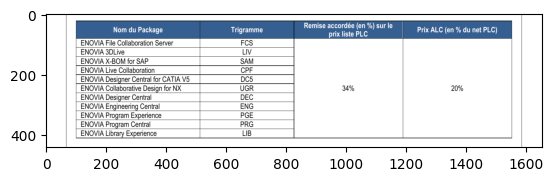

N Nom du Produit ENOVIA V6 Trigramme Remise accordee (en %) sur le prix liste YLC ENOVIA File Collaboration Server FCS ENOVIA 3DLive LIV ENOVIA X-BOM for SAP SAM ENOVIA Live Collaboration CPF ENOVIA Designer Central for CATIA V5 DC5 ENOVIA Collaborative Design for NX UGR 20% ENOVIA Designer Central DEC ENOVIA Engineering Central ENG ENOVIA Program Experience PGE ENOVIA Program Central PRG ENOVIA Library Experience LIB


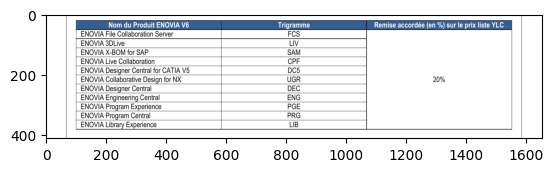

CATIA - MECHANICAL DESIGN 2 Configuration MD2 CATIA - HYBRID DESIGN 2 Configuration HD2 DMU KINEMATICS SIMULATOR 2 Product KIN DMU SPACE ANALYSIS 2 Product SPA CATIA - PRODUCT KNOWLEDGE TEMPLATE 1 KT1 Product CATIA - 3D FUNCTIONAL TOLERANCING & FT1 ANNOTATION 1 Product CATIA - 3D FUNCTIONAL TOLERANCING & FTA ANNOTATION 2 Product CATIA - CAST & FORGED PART OPTIMIZER 2 CFC Product CATIA - STEP CORE INTERFACE 1 Product ST1 CATIA - PPR PDM Gateway 1 Product PX1 CATIA - CORE & CAVITY DESIGN 2 Product CCV CATIA - FUNCTIONAL MOLDED PARTS 1 FM1 Product CATIA - FUNCTIONAL MOLDED PARTS 2 FMP Product


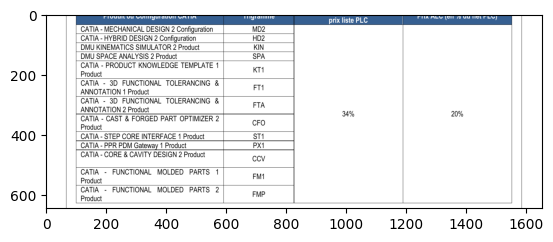

CATIA - MECHANICAL DESIGN 2 Configuration mD2 CATIA - HYBRID DESIGN 2 Configuration HD2 DMU KINEMATICS SIMULATOR 2 Product KIN DMU SPACE ANALYSIS 2 Product SPA CATIA - PRODUCT KNOWLEDGE TEMPLATE 1 KT1 Product CATIA - 3D FUNCTIONAL TOLERANCING & FT1 ANNOTATION 1 Product CATIA - 3D FUNCTIONAL TOLERANCING & FTA ANNOTATION 2 Product CATIA - CAST & FORGED PART OPTIMIZER 2 CFO Product CATIA - STEP CORE INTERFACE 1 Product ST1 CATIA - PPR PDM Gateway 1 Product PX1 CATIA - CORE & CAVITY DESIGN 2 Product CCV CATIA - FUNCTIONAL MOLDED PARTS 1 FM1 Product CATIA - FUNCTIONAL MOLDED PARTS 2 FMP


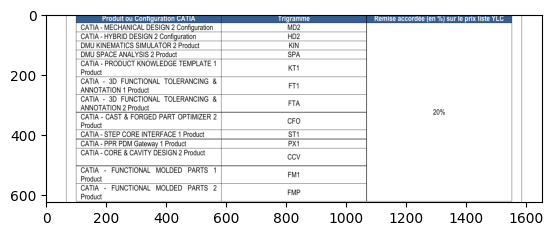

Montant net commandé (en euros H.T.) Remise accordee (en % Entre 0 € et 249 999 € 0% Entre 250 000 € et 499 999€ 3% Entre 500 000  et 749 9996 4% Entre 750 000 et 1 000 000€ 6% Au-dela de 1 000 0006 8.25%


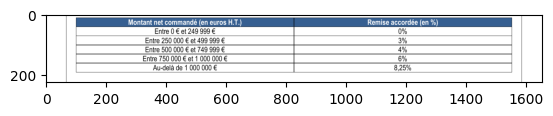

Montant net commandé (en euros H.T.) Remise accordee (en % 55 700€ 2,5% 81 200 € 5% 114 100 € 7.5% 1514006 10% 226 100€ 15% 343 400€ 20% 499 300毛 25% 696 900 € 30% 916 300€ 35%


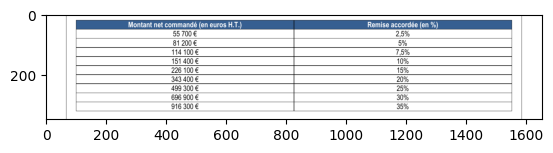

Production De 0 € à 93 999 € 17,5% Production De 94 000à 199 999€ 20% Production De 200 000à 349 999 € 21% Production Plus de 350 000 € 22% Développement (iSight Utilisation Développement) N/A 75%


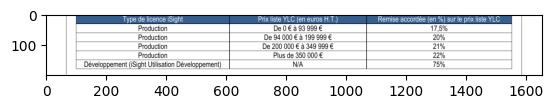

Portfolio Release Trigramme Nom du Produit Ref. produit Quantitie DELMIA Apriso Apriso 2020 AXP Execution Platform 5MP-AXF 1 DELMIA Apriso Apriso 2020 X1P Execution Platform 5MP-X1P 150 Resource DELMIA Apriso Apriso 2020 APO Production 5MP-APC DELMIA Apriso Apriso 2020 P10 Production Resource 5MP-P1C 150 DELMIA Apriso Apriso 2020 AMT Maintenance 5MP-AMT 1 DELMIA Apriso Apriso 2020 M1T Maintenance Resource 5MP-M1T 150 DELMIA Apriso Apriso 2020 AWH Warehouse 5MP-AWH 1 DELMIA Apriso Apriso 2020 W1H Warehouse Resource 5MP-W1H 150 DELMIA Apriso Apriso 2020 ABI Business Integrator 5MP-ABI 1 DELMIA Apriso Apriso 2020 B1I Business 5MP-B1I Integrator 150 Resource DELMIA Apriso Apriso 2020 AMI Machine Integrator 5MP-AMI DELMIA Apriso Apriso 2020 M1I Machine 5MP-M1I Integrator 150 Resource DELMIA Apriso Apriso 2020 APM Process Manage 5MP-APM 1 DELMIA Apriso Apriso 2020 P1M Process S 5MP-P1M manage M er 150 Resource DELMIA Apriso Apriso 2020 AAR Archiving 5MP-AAR 1 DELMIA Apriso Apriso 2020 A1R Ar

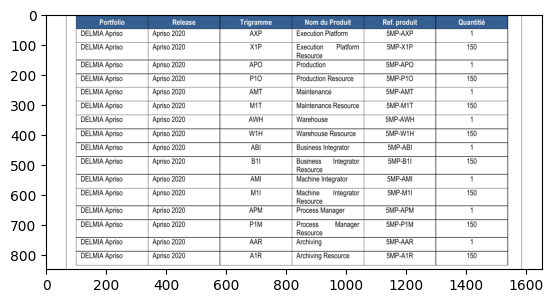

Portfolio Release Trigramme Nom du Produit Quantite Prix net PLC (HT) prix net PLC DELMIA Apriso Apriso 2020 N/A Configuration 1, 2 ou 3 2 2 140000 20% DELMIA Apriso Apriso 2020 Apriso 2020 MQI Quality Intelligence Pack 20% 1 125006 DELMIA Apriso Apriso 2020 MM Q Quality Intelligence Pack 20% DELMIA Apriso Apriso 2020 AWH M Narehouse 1 20% 156636 DELMIA Apriso Apriso 2020 H W1H Warehouse Resource 150 20% DELMIA Apriso Apriso 2020 AOM p Production Manager 1 20% 43166 DELMIA Apriso Apriso 2020 01M Production Manager Resource 150 20% DELMIA Apriso Apriso 2020 ASI P Production Manager Resource 1 2 2629€ 20% Center Of Excellence for an DELMIA Apriso Apriso 2020 1CE 18 530006 20% additional Site Global Traceability (for the first DELMIA Apriso Apriso 2020 AGT+1GT 1 105006 20% site) Global Traceability (for following DELMIA Aprisc Apriso 2020 1GT 1 105006 20% Sites) Autonomous Satellite Site* fo DELMIA Apriso Apriso 2020 N/A 1 250006 20% Configuration 1, 2 or 3 with MPI Autonomous Satellite S

KeyboardInterrupt: 

In [15]:
l = d.extractTables("../documents/purchasing_contract_example.pdf", df)

In [ ]:
import pytesseract
import matplotlib.pyplot as plt

def extractTables_(pdf, df):
        images = d.pdf2image(pdf)
        tables = df[df["category_name"] == "table"]
        l = []
        for i in range(tables.shape[0]):
            region = tables.iloc[i]["region"]
            page = int(tables.iloc[i]["page"])
            img = images[page]
            img = img[int(region[1])+100-20:int(region[-1])+100+20, :,:]

            data = pytesseract.image_to_string(img)
            
            l.append(data)
            plt.imsave(f"tables/table-{region}-page{page}.jpg", img)
            plt.imshow(img)
            plt.show()
        return l

In [ ]:
tables = extractTables_("../documents/purchasing_contract_example.pdf", df)

## Challenge 2: Chuncking + embedding 🧮

In [16]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 256,
    chunk_overlap  = 20
)

In [17]:
texts = []
for i in range(df.shape[0]):
    if df.iloc[i]["category_name"] == "plain text" or df.iloc[i]["category_name"] == "title" or df.iloc[i]["category_name"] == "header" or df.iloc[i]["category_name"] == "figure caption" or df.iloc[i]["category_name"] == "table caption":
        if "unique appartenant au" in df.iloc[i]["content"]:
            print(df.iloc[i]["content"])
        texts.append(df.iloc[i]["content"])

In [18]:
docs = text_splitter.create_documents(texts)

In [19]:
def chuncking(txt):
    docs = text_splitter.create_documents(texts)
    return pd.DataFrame([i.page_content for i in docs], columns=["chuncks"])

In [20]:
chuncks = chuncking(texts)

In [21]:
from sentence_transformers import SentenceTransformer
model =  SentenceTransformer("dangvantuan/sentence-camembert-large")

config.json:   0%|          | 0.00/683 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/809k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

In [22]:
def embedding(d):
    e = model.encode(d["chuncks"])
    d["embeddings"] = e.tolist()
#     d["ids"] = [f"doc{i+1}" for i in range(d.shape[0])]
    return d

In [23]:
chuncks = embedding(chuncks)

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

In [24]:
chuncks

,chuncks,embeddings
0,AVENANT N°5 (ref 2021-15874),"[-0.3560839295387268, -0.34902799129486084, 0...."
1,AU CONTRAT CADRE CLIENT DE LICENCE ET DE SERVI...,"[0.17224104702472687, 0.18271885812282562, 0.1..."
2,"Le present avenant (c-apres,I‘w Avenant N""5 ) ...","[-0.02520272135734558, -0.26985621452331543, 0..."
3,"europenme de droi fancais, dont e siege socale...","[0.10028597712516785, -0.0003191527212038636, ..."
4,dont le siege social est sis 19 Boulevard Jule...,"[0.03617846220731735, -0.046792007982730865, -..."
...,...,...
172,4.7. Cession par DS,"[0.035654980689287186, 0.12960749864578247, 0...."
173,L'article 14.10 des Conditions Générales est m...,"[-0.5745832324028015, -0.4059491753578186, -0...."
174,"14.10. DS e resenve le droit de ceder, deleque...","[-0.2994324266910553, -0.06207720562815666, 0...."
175,"tout tiers, sans le consentement du Client","[-0.41874009370803833, 0.22491231560707092, -0..."


## Challenge 3: Vector db 💾

In [25]:
from langchain_chroma import Chroma
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)

embedding_function = SentenceTransformerEmbeddings(model_name="dangvantuan/sentence-camembert-large")

/opt/conda/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(


In [35]:
db = Chroma.from_texts(chuncks["chuncks"].to_list(), embedding_function)

In [42]:
query = "c'est quoi la définition de machine"
docs = db.similarity_search(query)

In [43]:
docs

[Document(page_content='Machine desiqne un matenielifomatique sur lequel un Produit Eligible est execute (1)(a) appartenant au Client Principal ou a une Flitl Beneficiaire ou sous leur seul controle ou supervision et (b)stue dans les ocaux du Client Prncipal ou d une Fflitl'),
 Document(page_content='Utlisation [Pays ou Geo desione le droi pourles Ulisateurs d utiser, sur des Machines,les Produits Eigibles pour lesquels une tlle utlisation Pays ou Geo Iong est prevue dans le Document de Transacton a la condition que les Utlisateurs et les Machines,tels'),
 Document(page_content='les Machines,tels que definis aux presentes, soient situes dans ledit Pays ou'),
 Document(page_content='europenme de droi fancais, dont e siege socalest situe en France 10, rue Marcel Dassault, 78140 Veliy-Vilcoublay (ci-apres,  DS ) et dlautre part, PLASTIC OMNIUM GESTION, une societe de droit francais inmatricule sous le numero 410314207, dont le siege')]

1024